In [1]:
%load_ext autoreload
%autoreload 2
import sys
import os
import urllib
import numpy as np
import scipy.stats
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split
from sklearn.svm import SVC
from sklearn.utils import shuffle

import helpers # Notebook helpers

sys.path.append(os.path.join('..'))
from adp.curve import * 
from adp.utility import *
from adp.plot import *
from adp.funcs import *
from adp.optim import *

In [2]:
def plot_curves(best_curves, utility, figsize=None, ylabel='Score', **plot_kwargs):
    n_change = len(best_curves)
    if figsize is None:
        figsize=np.array([8*n_change, 4])*0.65
    fig, axes = plt.subplots(1, n_change, figsize=figsize, dpi=150, sharey=True)
    if n_change == 1:
        axes = np.array([axes])#.reshape(n_change)
    for c, ax in zip(best_curves, axes):
        plot_curve_vals(c, utility=utility, feature_labels=feature_labels, ax=ax, **plot_kwargs)
    if ylabel is not None:
        axes[0].set_ylabel(ylabel)
    fig.tight_layout()
    return axes

def plot_best_explanation(x0, utility, n_numeric_change=1, max_categorical_change=0, **plot_kwargs):
    if np.isscalar(n_numeric_change):
        n_numeric_change = [n_numeric_change]
    best_curves = [
        optimize_curve(x0, utility, X, max_numeric_change=nc, 
                       max_categorical_change=max_categorical_change, dtypes=dtypes)
        for nc in n_numeric_change
    ]
    plot_curves(best_curves, utility, **plot_kwargs)
    return best_curves, utility

In [3]:
# Fetch/download data
D = helpers.fetch_german_data()
X, y, dtypes, feature_labels = D['X'], D['y'], D['dtypes'], D['feature_labels']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

# Train models
model_names = ['RandomForest']
model_dicts = helpers.create_and_train_models(model_names, dtypes, X_train, y_train, X_test=X_test, y_test=y_test)
model = model_dicts[0]['model'] 

Loading fitted model from cache via file cached_model_fb7374c7dcc452ce6c116da62ee67c8a9229a5bf.pkl


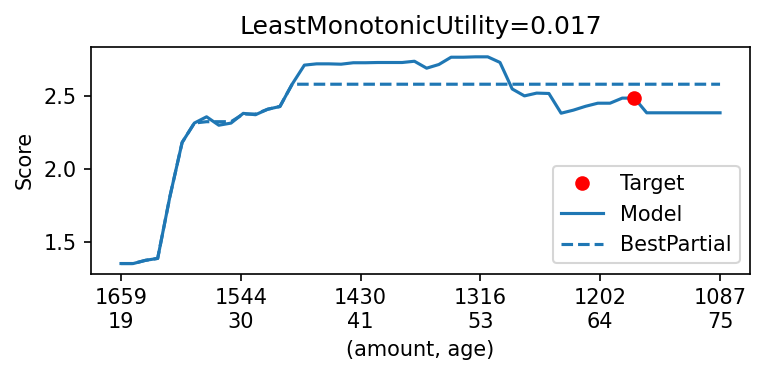

In [4]:
# Paper figure
curves, utility = plot_best_explanation(X[0, :], LeastMonotonicUtility(model), 
                                        n_numeric_change=[2])
plt.savefig('demofig.pdf', bbox_inches='tight', pad_inches=0)

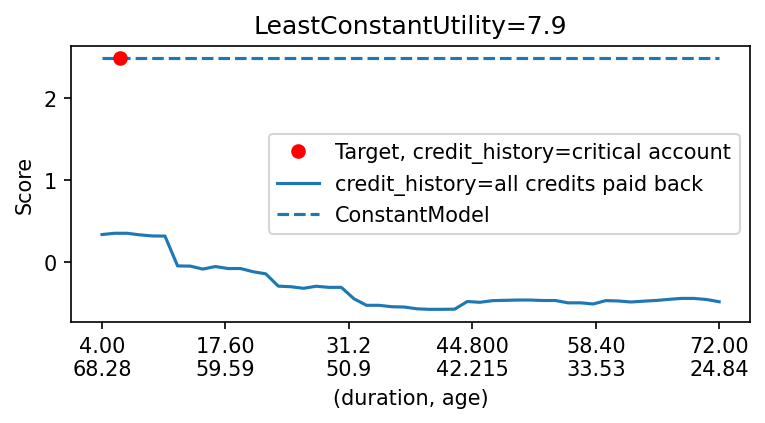

In [5]:
curves, utility = plot_best_explanation(X[0, :], LeastConstantUtility(model), 
                                        n_numeric_change=[2], max_categorical_change=1,
                                        figsize=np.array([8, 4.5])*0.65, #legend_kwargs=dict(loc=[0.22,0.45]),
                                        other_model_label='ConstantModel')

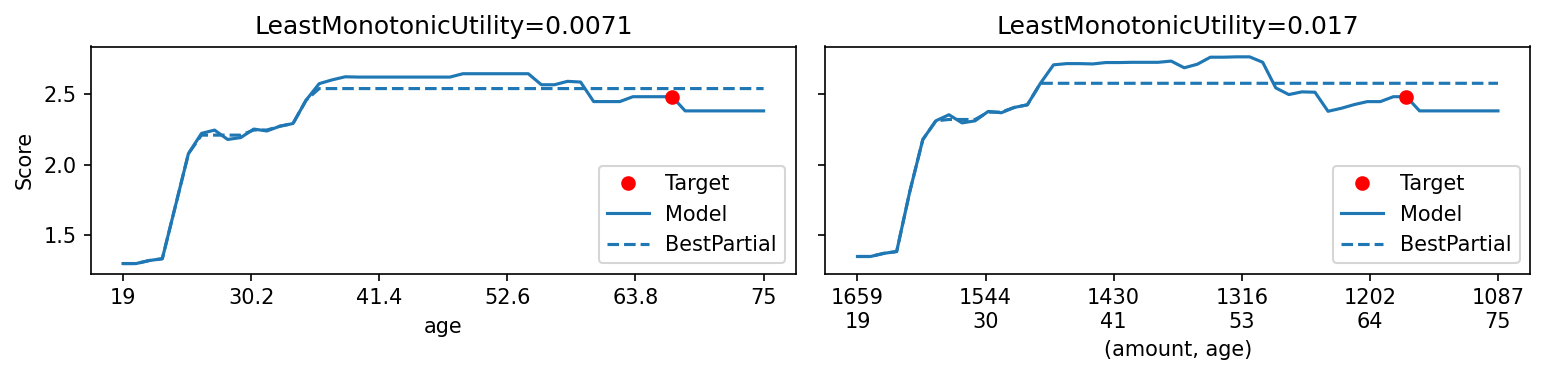

In [6]:
curves, utility = plot_best_explanation(X[0, :], LeastMonotonicUtility(model), n_numeric_change=[1, 2])

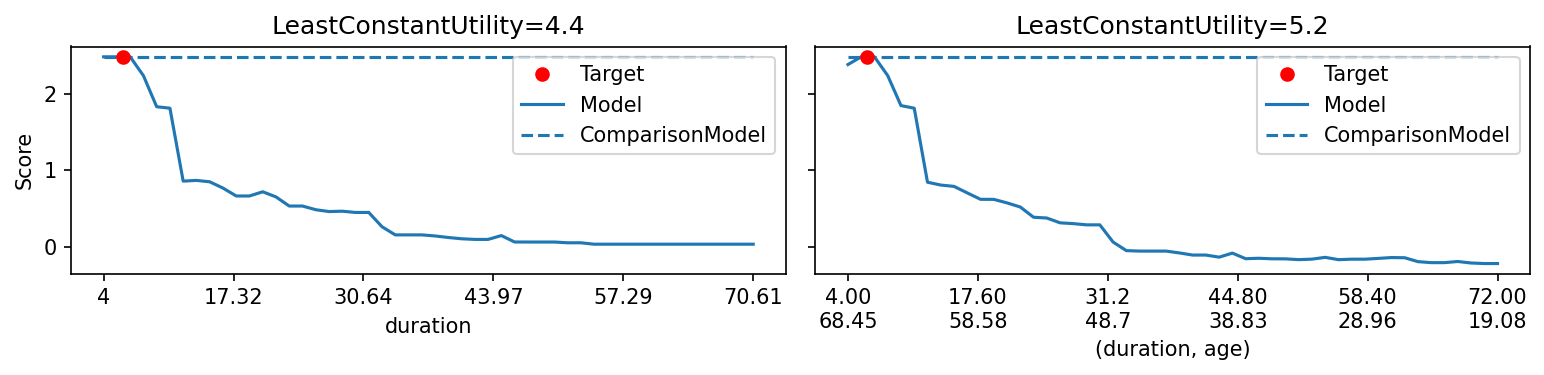

In [7]:
curves, utility = plot_best_explanation(X[0, :], LeastConstantUtility(model), n_numeric_change=[1, 2])

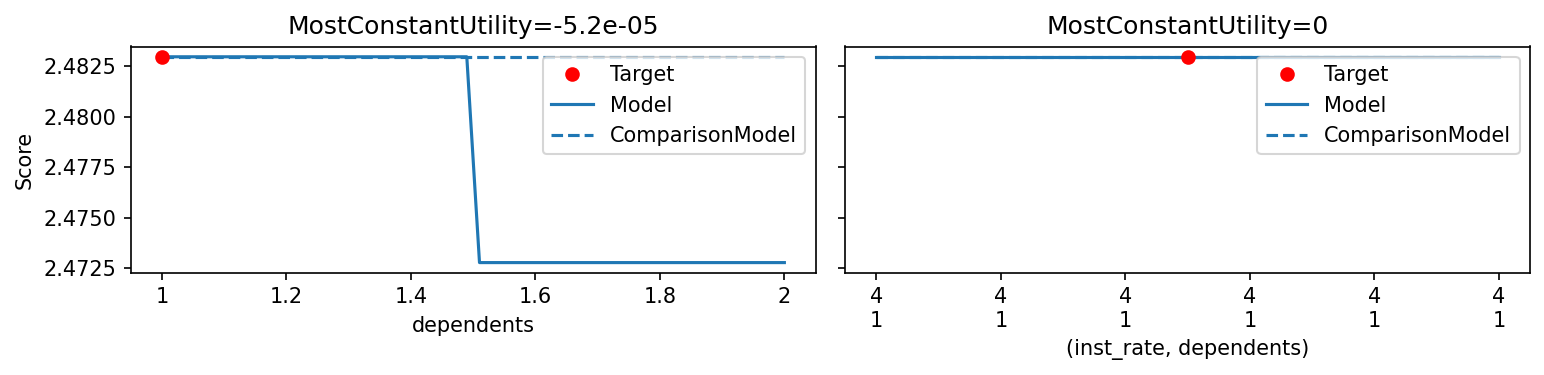

In [8]:
curves, utility = plot_best_explanation(X[0, :], MostConstantUtility(model), n_numeric_change=[1, 2])

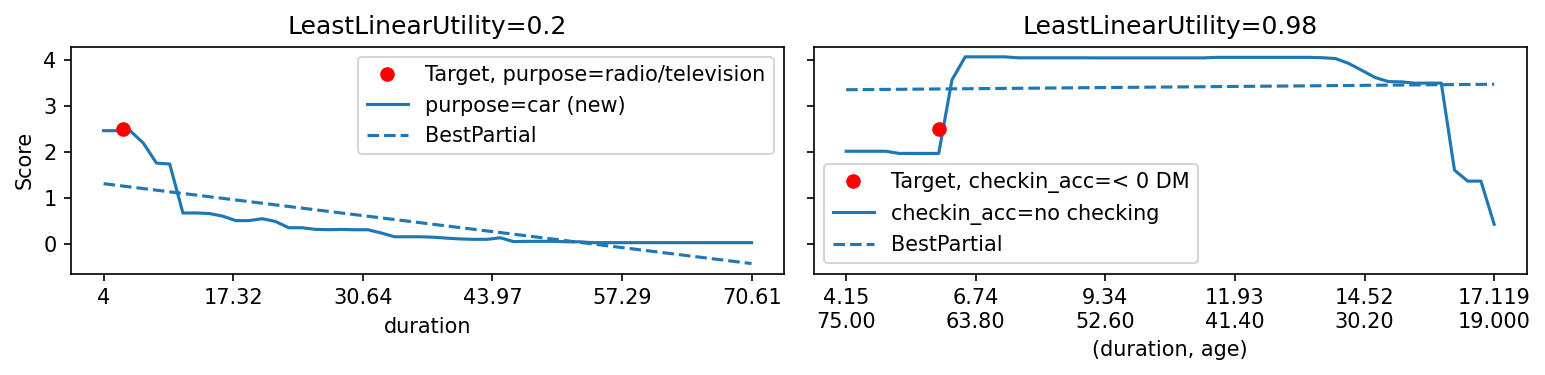

In [9]:
curves, utility = plot_best_explanation(X[0, :], LeastLinearUtility(model), 
                                        n_numeric_change=[1, 2], max_categorical_change=1)

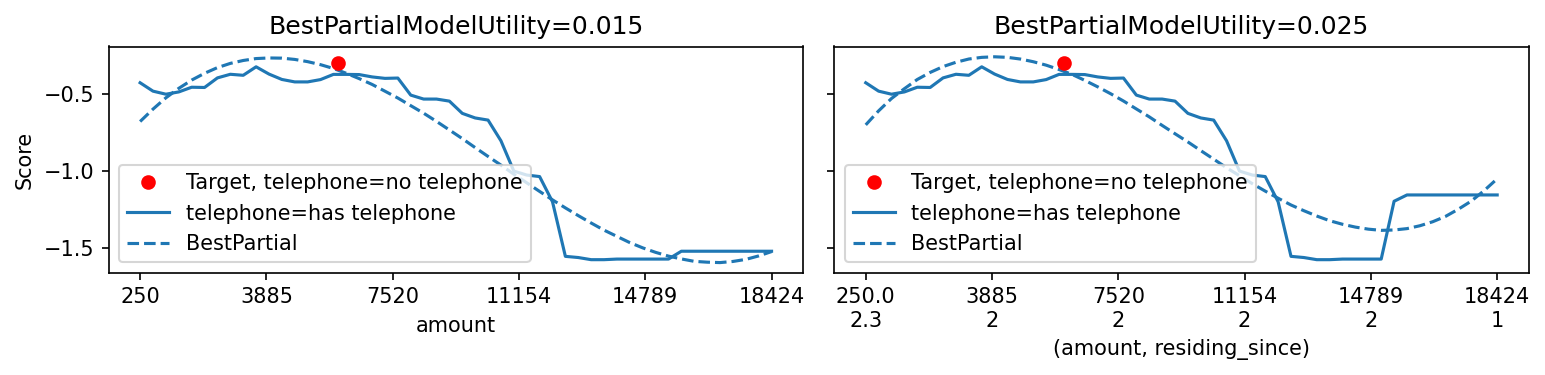

In [10]:
from sklearn.kernel_ridge import KernelRidge
rbf_utility = BestPartialModelUtility(model, regression_estimator=KernelRidge(
    kernel='rbf', gamma=0.001, alpha=1e-13,
))
curves, utility = plot_best_explanation(X[1, :], rbf_utility, 
                                        n_numeric_change=[1, 2], max_categorical_change=1)